# Logistic Regression 2025  --- Part I


In [130]:
# importing the required modules
# %pip install numpy matplotlib seaborn pandas scikit-learn #installs them if they are not yet there
import numpy as np 
import matplotlib.pyplot as plt
# to get matplot figures render correctly in the notebook use:
%matplotlib inline 
import pandas as pd
import seaborn as sns

### Let's start by thanking the creators of the dataset that we will be using:

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

## Loading and Inspecting the Data

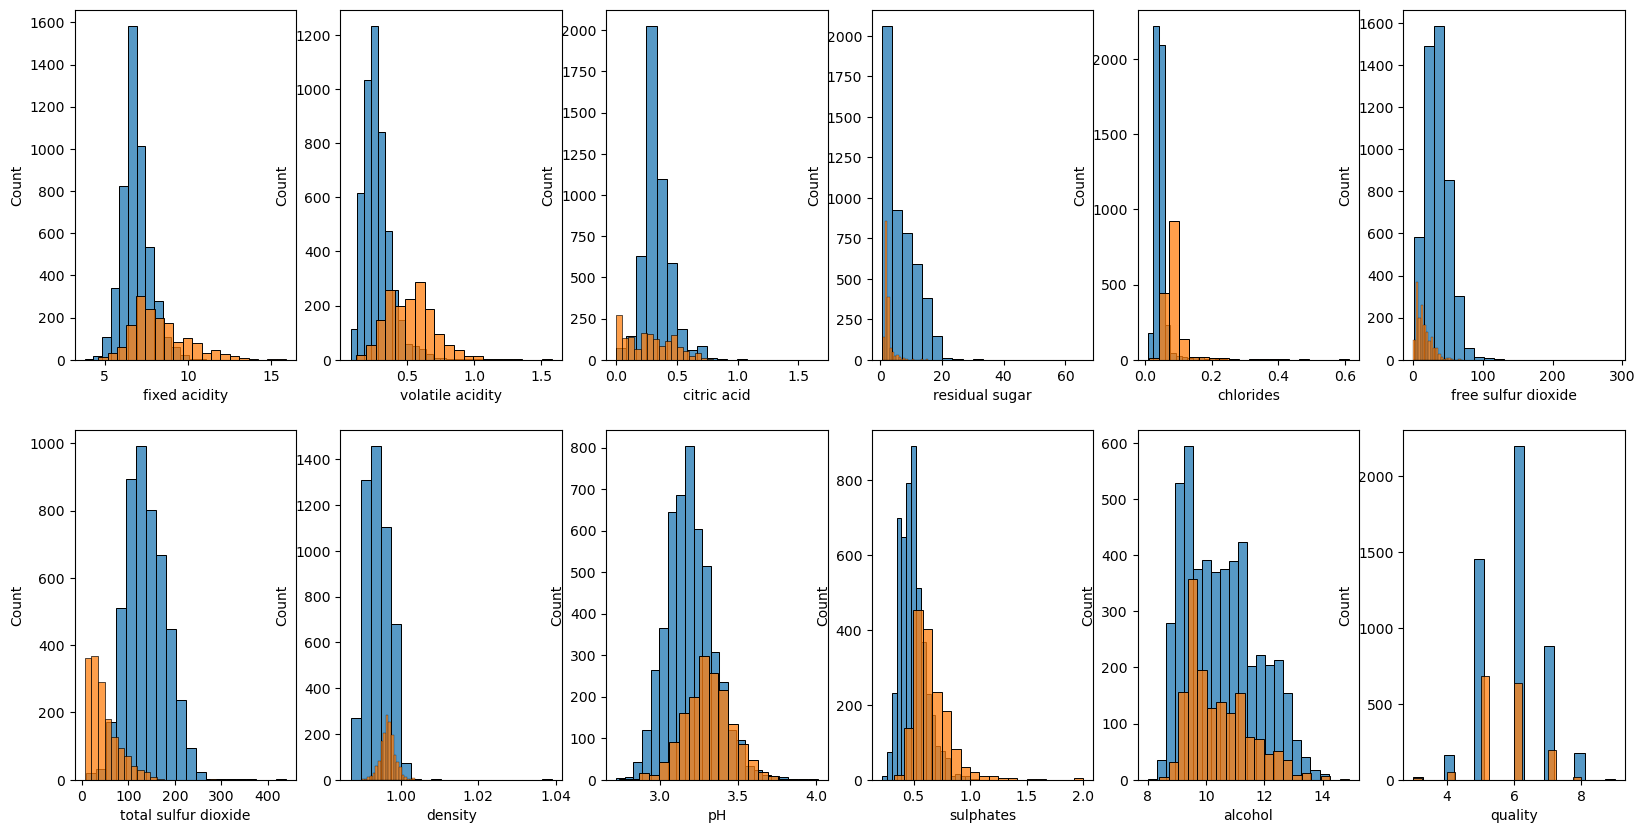

In [131]:
####INSTRUCTOR PART#####
rwine = pd.read_csv('winequality-red.csv', sep=';')  # Makes Pandas objects
wwine = pd.read_csv('winequality-white.csv', sep=';')  
fig,ax= plt.subplots(ncols=6, nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in wwine.items():
    sns.histplot(value, bins=20,ax=ax[index])
    index+=1
index=0
for col, value in rwine.items():
    sns.histplot(value, bins=20,ax=ax[index])
    index+=1

The first step in all machine learning problems is to load and inspect the data. First, let's load the data.   
The datafile `winequality-red.csv` is a ;-separated file that contains data of 1599 scientific meaurments of red wine. The file contains 11 columns which we will use as the features to describe the quality of the wine (last column).
The datafile `winequality-white.csv` is a similar file but contains data of 4898 scientific meaurments of ___white___ wine. 

Use the code snippet below to load the data into a Pandas object `rwine` and `wwine`. ___We also add an additional column stating the color of the wine red(1)/white(0).___

In [132]:
#PATH to the training data
rwine = pd.read_csv('winequality-red.csv', sep=';')  # Makes Pandas objects
wwine = pd.read_csv('winequality-white.csv', sep=';')  
rwine.insert(12, "color", np.ones(len(rwine)), True)
#rwine.head()
wwine.insert(12,"color", np.zeros(len(wwine)), True)
rwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0



Inspect the data by looking at the types of data in the columns.

In [133]:
#This prints how many measurements of wines are in our database:
shape = wwine.shape
print(f'shape = {shape}')
#wwine.isnull().sum()

shape = (4898, 13)


What we see is that that the 11 features are real numerical values (floats of 64 bits) and the quality of the wine has been rated with an integer mark.

Now, inspect the numbers by e.g. printing the shape of `data` and the first couple of rows (this is called the header).

## Research question:

In this notebook we will several features available to us. Our research question is:

__Based on the scientific measurments and the quality can we classify a wine to be red or white?__

The first question that we have to solve is which ___two___ features (x1,x2) say the about the wine being red or white? Use the descibe function of pandas to ask for statistics and motivate your choice on the basis of those numbers.

In [134]:
# Some statistics about our data:
print(rwine.describe())
print(wwine.describe())
# Which two features will you pick to predict red/white wine?

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

Text(0, 0.5, 'feature 2')

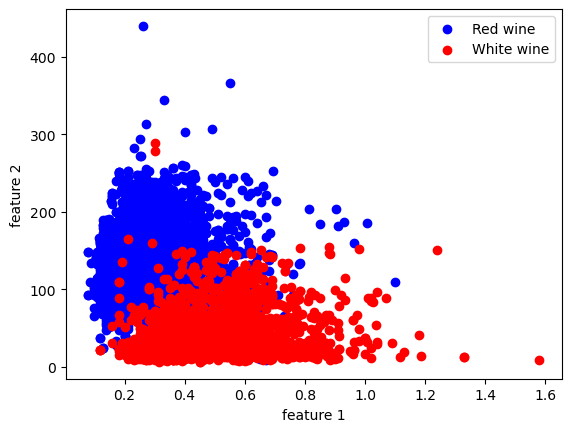

In [135]:
# create a plot of the data belonging to those two features.
# make a scatter plot the values of feature 1 on the x-axis and that of feature 2 on the y-axis
# plot a blue marker for white and a red marker for red wines

f1='volatile acidity'
f2='total sulfur dioxide'

plt.scatter(wwine[f1],wwine[f2], c='b', marker='o', label='Red wine')
plt.scatter(rwine[f1],rwine[f2], c='r', marker='o', label='White wine')
plt.legend()
plt.xlabel('feature 1')
plt.ylabel('feature 2')


## Create combined red/white wine dataset and split in training and test set

Combine both red and white wine datasets in a new set and **shuffle** the samples using pandas functions. Take the first 70\% of your suffled set and assigne it the training set and the the remaining 30\% to the test set.

In [136]:
# Combine red and white wine pandas object into one new shuffled dataset:
wines=pd.concat([wwine,rwine])
wines = wines.sample(frac = 1)

# the number of samples (wines) M in the total combined set
M = len(wines)
# the number of features N (excluding the bias)
N = 2

# Split data in 70% train &  30% test sets:

# the number of samples M in the training and test set
Mtrain = int(0.7*M)
Mtest = M-Mtrain
print(M,Mtrain,Mtest)

#Split the shuffled 
x1data_train=wines[f1][0:Mtrain]       # data of your selected feature 1
x2data_train=wines[f2][0:Mtrain]       # data of your selected feature 2
label_train= wines['color'][0:Mtrain]  # label red(1)/white(0) wine
x1data_test= wines[f1][Mtrain:]
x2data_test= wines[f2][Mtrain:]
label_test= wines['color'][Mtrain:]

6497 4547 1950


## Feature scaling (important!)

Before we can setup the logistic regression model it is important to apply feature scaling to each of our selected feature vectors. For this you need to compute the _mean_ ($\mu$) and the _standard deviation_ $(\sigma_{\rm std})$ of each feature vector and apply the following scaling (leture notes Eq. (3.15)):

$$  \mathbf{x}=\frac{ \mathbf{x} -\mu}{\sigma_{\rm std}}$$ 

Write below one function based on input $(\mu,\sigma_{\rm std})$ to feature scale a vector and one to undo (inverse) the feacture scaling.


In [137]:
#write a forward and a backwards function that does your feature scaling
def fscale(x,mean,std):
    """
    returns the feature scaled vector x

    Parameters
    ----------
    x : ndarray of shape (M, 1)
        feature matrix.
    mean : float
    std : float

    Returns
    -------
    scaled x : same type and shape as x

    """
    x = (x-mean)/std
    return x

def fscale_inv(x,mean,std):
    """
    returns the vector x

    Parameters
    ----------
    scaled x : ndarray of shape (M, 1)
        feature matrix.
    mean : float
    std : float

    Returns
    -------
    x : same type and shape as scaled x

    """
    x = mean + std*x
    return x

Compute the _mean_ and _std_ of the features in your training data and use the to scale both the train and test set.

In [142]:
# Compute the mean and the std of features x1 and x2 of your training and test sets:
mean1=np.mean(x1data_train)
std1= np.std(x1data_train)
mean2= np.mean(x2data_train)
std2= np.std(x2data_train)
mean1test= np.mean(x1data_test)
std1test= np.std(x1data_test)
mean2test= np.mean(x2data_test)
std2test= np.std(x2data_test)

# Verify that the means and std of the training and test sets are comparable:
print('means_train:',mean1,mean2)
print('means_test:',mean1test,mean2test)
print('stds_train:',std1,std2)
print('stds_test:',std1test,std2test)

#Feature scale training and test set using the means and stds obtained on the training set.
x1data_train= fscale(x1data_train, mean1, std1)
x2data_train= fscale(x2data_train, mean2, std2)
x1data_test= fscale(x1data_test, mean1test, std1test)
x2data_test= fscale(x2data_test, mean2test, std2test)

means_train: 0.3435067077193754 115.06124917528041
means_test: 0.3307102564102564 117.33794871794872
stds_train: 0.16858595761052023 56.55212634061778
stds_test: 0.15462177392504944 56.404542878483596


## Defining the model

We will build a logistic model to define a boarder line between the red and white wines. The classification is then based on wheter the model predicts a certain set of f1/f2 numbers to be either on the left or the right side of this line.

The logistic regression model is given by (lecture notes eq. 3.4):
$$  \mathbf{h}_{\theta} (\mathbf{X})  = \sigma (\mathbf{X} \boldsymbol{\theta})$$ 
with $\mathbf{X}$ the feature matrix , $\mathbf{h}$ the prediction (as a value between 0 and 1), $\boldsymbol{\theta}$ the weight vector and the function $\sigma()$ the logistic function given by:
$$ \sigma (z) = \frac{1}{1 + e^{-z}}   $$

The weight vector is found by minimizing the *loss* $L$. The loss in this case is given by (lecture notes eq. 3.9):
$$  L = - \frac{1}{M} \left ( \mathbf{y}^T \ln \left [ \sigma \left ( \mathbf{X}\boldsymbol{\theta} \right ) \right ] + \left ( \mathbf{1} - \mathbf{y} \right )^T  \ln \left [\mathbf{1} - \sigma \left ( \mathbf{X}\boldsymbol{\theta} \right ) \right ]  \right ) $$


#### Create the feature matrix and label vector

The feature matrix is represented by a 2D numpy array `X` composed of a column filled with ones (the bias) and column(s) with the feature(s). Also we need to define the label vector y as a 2D numpy array `y`.

In [143]:

# define the feature matrix as a ( Mtrain x N+1 ) ndarray
X = np.column_stack((np.ones(Mtrain), x1data_train, x2data_train))
# define the label vector as a (Mtrain x 1) ndarray
y= np.expand_dims(label_train, axis=-1)
# define some intital guess for the theta vector as a (N+1 x 1) ndarray
theta = np.expand_dims(np.linspace(0.1, 1, N+1), axis=-1)
print(y.shape,X.shape, theta.shape) # Should result (4547, 1) (4547, 3) (3, 1)


(4547, 1) (4547, 3) (3, 1)


#### Since we will need the logistic function let's implement a function for that.

In [144]:
def sigmoid(z):
    """
    returns the sigmoid function of z

    Parameters
    ----------
    z : float or ndarray

    Returns
    -------
    1 / (1 + exp(-z)) : same type and shape as z

    """
    z = np.float64(z) # to increase precision of the variable z
    z = 1/(1 + np.exp(-z))
    
    return z

#### Implement the loss function
Next, define a function that computes the loss given the feature matrix, the label vector and the weight vector.

function | description
----|----
`compute_loss(X, y, theta)` | This function takes the feature matrix `X`, label vector `y` and the weight vector `theta` and returns the loss


In [145]:
def compute_loss(X, y, theta):
    """
    Computes the loss (or cost)

    Parameters
    ----------
    X : ndarray of shape (M, N+1)
        feature matrix.
    y : ndarray of shape (M, 1)
        label vector.
    theta : ndarray of shape (M, 1)
        weights vector.        

    Returns
    -------
    Loss : float

    """
    M = len(y)
    
    loss = -1/M * (y.T @ np.log(sigmoid(X @ theta)) + (1-y).T @ np.log(1-sigmoid(X @ theta)))
    
    # check if loss has a valid value, if not, let loss be infinite
    if np.isnan(loss):
        loss = np.inf
    return loss.item()

In [146]:
# test the function with some value for theta
theta = np.expand_dims(np.linspace(0.5, 1, N+1), axis=-1)
loss = compute_loss(X,y,theta)
print(loss)

1.031344804697046


## Train the Model

The next step is to train the model. We use the gradient descent algortihm for this. The weight vector is updated according to:
$$  \boldsymbol{\theta} \rightarrow \boldsymbol{\theta} - \eta \frac{\mathrm{d} L}{\mathrm{d} \boldsymbol{\theta}} $$
where $\eta$ is a *hyperparameter* that allows to tune the rate of descent, and the gradient defined as (lecture notes eq. 3.10) ___note the small difference wrt. linear regression of last week___:

$$  \frac{\mathrm{d} L}{\mathrm{d} \boldsymbol{\theta}}  = \frac{1}{M} \mathbf{X}^T  \left ( \sigma \left ( \mathbf{X}  \boldsymbol{\theta} \right ) - \textbf y \right ) $$

Therefore we need to implement the following functions:

function | description
--------|----
`gradient(X, y, theta)` | This function takes the feature matrix `X`, label vector `y` and the weight vector `theta` and returns the gradient of the loss w.r.t. the weight(s)
`train(X, y, theta, eta, num_iters)` | This function takes the feature matrix `X`, label vector `y`, the weight vector `theta`, hyperparameter `eta` and the number of iteration steps `num_iters`, and returns the weight vector the minimises the loss.

__Minimizing the logistic loss by direct computation?__
Note that in logistic regression we cannot minimize the loss by a direct computation. We therefore have to always have to optimize theta via gradual optimisation methods, such as gradient desent.

In [147]:
def gradient(X, y, theta):
    """
    Computes the gradient vector

    Parameters
    ----------
    X : ndarray of shape (M, N+1)
        feature matrix.
    y : ndarray of shape (M, 1)
        label vector.
    theta : ndarray of shape (M, 1)
        weights vector.        

    Returns
    -------
    grad : ndarray of shape (N+1, 1)
        the gradient

    """
    M = len(y)
    grad = 1/M * X.T @ (sigmoid(X @ theta) -y)
    return grad

In [148]:
# test the function for some value of theta
theta = np.expand_dims(np.linspace(0.1, 1, N+1), axis=-1)
grad = gradient(X, y, theta)
print(grad)

[[ 0.26515466]
 [-0.27013379]
 [ 0.46846158]]


Next, define the function `train()` that implements the gradient descent algorithm.

In [149]:
def train(X, y, theta, eta = 0.01, num_iters = 7500):
    """
    Implements the gradient descent algorithm for a linear regression model

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column
    y : (M x 1) ndarray
        label vector
    theta : (N+1 x 1) ndarray
        The weight vector inlcuding the bias
    eta : float, optional
        The rate. The default is 0.01.
    num_iters : int, optional
        Number of iterations that is performed. The default is 7500.

    Returns
    -------
    theta : (N+1 x 1) ndarray
        The optimised weight vector    
    loss : (num_iters,) ndarray
        The loss at each iteration
    """
    loss = np.zeros(num_iters)
    
    for ii in range(num_iters):
        theta = theta - eta * gradient(X, y, theta)
        loss[ii] = compute_loss(X, y, theta)

    return (theta, loss)

We can now train the model.

In [155]:
# intialize theta to some value
theta = np.expand_dims(np.linspace(0.1, 1, N+1), axis=-1)
# train the model
theta, loss = train(X, y, theta, eta = 0.02, num_iters = 50000)
# print the computed weight vector
print(f'weigths: {theta}')

weigths: [[-3.37691951]
 [ 2.25442395]
 [-3.68541028]]


First have a (critical) look at how the loss changed during the training by plotting the loss versus the iteration number:

Text(0, 0.5, 'Loss')

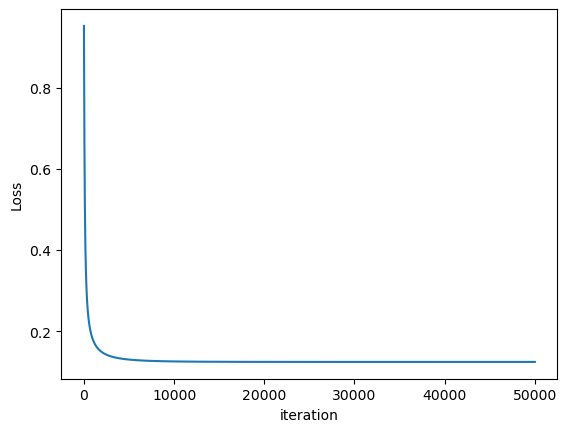

In [156]:
# create a plot of the loss versus the interation number
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('Loss')

## Evaluate the model

To evaluate the model, we need a function `predict(X, theta, threshold=0.5)` that predicts the label `y` given some new values of the features `X` and a `threshold` value that determines the decision boundary (defaults to 0.5). Implement this function below.

In [157]:
def predict(X, theta, threshold = 0.5):
    """
    Predicts the label y given features X for a logistic regression model with weights theta

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column 
    theta : (N+1 x 1) ndarray
        The weight vector inlcuding the bias
    threshold : float (default=0.5
        the threshold value of the decision boundary

    Returns
    -------
    y_pred : (M x 1) ndarray
        The predicted labels (either 0 or 1)    
    """  
    #prediction = np.heaviside(sigmoid(X @ theta)-threshold, 1)
    prediction = sigmoid(X @ theta) >= threshold
    #print(sigmoid(X @ theta)[:10],prediction[:10])
    
    y_pred = prediction.astype('int')  # convert to integer (0 or 1)
    return y_pred

### Benchmark the validity of your model with respect to the test set

First, to see how well the model predicts the correct label compute the percentage of correct predictions for the training set.
Compute the prediction error on the test set.

In [158]:
# compute how many % of the predictions are correct with your current model
ypred = predict(X, theta, threshold = 0.5)
print(f'Training accuracy : {100 * np.mean(y==ypred)}%')

Training accuracy : 95.64548053661755%


Scond, Compute the prediction error on the test set.

In [159]:
# define the feature matrix as a ( Mtest x N+1 ) ndarray
Xtest = np.column_stack((np.ones(Mtest), x1data_test, x2data_test))   
# define the label vector as a (Mtest x 1) ndarray
ytest = np.expand_dims(label_test, axis=-1)
# compute how many % of the test set predictions are correct with your current model
p = predict(Xtest, theta, threshold = 0.5)
print(f'Test accuracy : {100 * np.mean(ytest==p)}%')

Test accuracy : 95.02564102564102%



At this point it is possible that your model has a higher accuracy on the training set than on the test set. This means that your model is over-fitted (over specialised) on that dataset.


## Visualise the decision boundary
You have to plot the training and test data together with the decision boundary (similar to figure 3.3. of the reader).  Below you will create a rectangular grid with the width based on the min and max values in you features 1 and 2. Apply your model to predit the label on this grid. The decision boundary lies at 0.5, ___why?__, _if you were to plot two lines at 0.3 and 0.7 what would your model say about the samples that lie inbetween?_

**Do not forget to invert the effects of the feature scaling before plotting your results!**

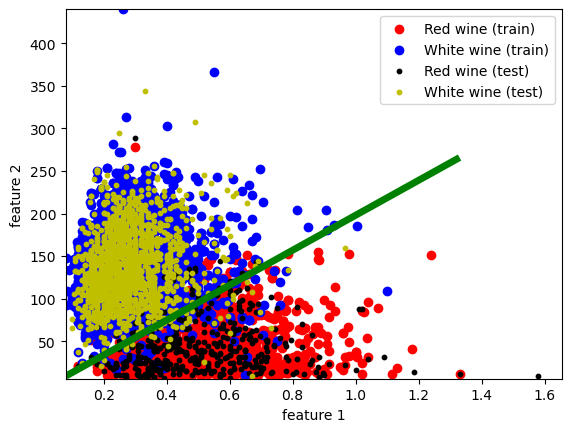

In [161]:
# make a scatter plot the values of feature 1 on the x-axis and that of feature 2 on the y-axis

# Create a mask from you labels where color=1 and color=0:
mask1 = label_train[:] == 1
mask2 = label_train[:] == 0
# Inverse the feature scaling on x1data_train and x2data_train and call the results d1 and d2:
d1= fscale_inv(x1data_train,mean1,std1)
d2= fscale_inv(x2data_train,mean2,std2)
# plot a blue marker for white and a red marker for red wines in the training set
plt.scatter(d1[mask1], d2[mask1], c='r', marker='o', label='Red wine (train)')
plt.scatter(d1[mask2], d2[mask2], c='b', marker='o', label='White wine (train)')

# The same as above but now for the test set:
mask1 = label_test[:] == 1
mask2 = label_test[:] == 0
d1= fscale_inv(x1data_test,mean1test,std1test)
d2= fscale_inv(x2data_test,mean2test,std2test)
plt.scatter(d1[mask1], d2[mask1], c='k', s=10, marker='o', label='Red wine (test)')
plt.scatter(d1[mask2], d2[mask2], c='y', s=10, marker='o', label='White wine (test)')

plt.legend()
plt.xlabel('feature 1')
plt.ylabel('feature 2')

# the code below plots the decision boundary in the plot. This is a bit of an overkill for our current simple (straight line) model,
# but can also be used in the same wat when you add higher order polynimal features in the Design matrix.

# build mesh of gridpoints
x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

# compute hypothesis on the meshgrid 
# first create a Mx2 ndarray with the values of the scores on the mesh 
data_mesh = np.column_stack((xx1.ravel(), xx2.ravel()))
# compute the full feature matrix
bias = np.ones(len(data_mesh)).reshape(-1,1)
X_mesh = np.column_stack((bias, data_mesh))
# compute the predicted labels (h) with you model on this mesh (do not force integers as the predict function does):
h = sigmoid(X_mesh @ theta)
h = h.reshape(xx1.shape)

# Before plotting the contour levels you should undo the feature scaling on the grids xx1,xx2:
xx1= fscale_inv(xx1,mean1,std1)
xx2= fscale_inv(xx2,mean2,std2)

# plot the contour level(s)
plt.contour(xx1, xx2, h, [0.5], linewidths=5, colors='g')

# Logistic Regression 2025  --- Part II --- The full monty

Lets see how far we can go in our attempt to make 'a near 100\%' ( a sales person would say: fool proof) classification model of white/red wines. We will use all avalaible data, including wine quality, to predict the color of the wine.

In [163]:
# We still have our combined and shuffled dataset wines:
wines = wines.sample(frac = 1)
# We just drop the 'color' from the dataset:
wines_nocolor=wines.drop('color', axis=1)

# the number of samples M in the total combined set is still the same
M = len(wines_nocolor)
# the number of features N (excluding the bias) are now all (including f='quality'):
N = len(wines_nocolor.columns)
wines_nocolor.head() # We will use everything you see here.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
465,6.3,0.21,0.58,10.0,0.081,34.0,126.0,0.99620,2.95,0.46,8.9,5
4373,6.1,0.26,0.28,1.7,0.043,24.0,98.0,0.98918,3.14,0.44,12.5,6
1131,6.9,0.23,0.34,4.0,0.047,24.0,128.0,0.99440,3.20,0.52,9.7,6
469,8.7,0.82,0.02,1.2,0.070,36.0,48.0,0.99520,3.20,0.58,9.8,5
2684,6.6,0.21,0.29,1.8,0.026,35.0,128.0,0.99183,3.37,0.48,11.2,6


In [164]:
# Split data in 70% train &  30% test sets:

# the number of samples M in the training and test set
Mtrain = int(0.7*M)
Mtest = M-Mtrain
print(M,Mtrain,Mtest)

#Split the shuffled dataset wines_nocolor. We will immediately define the 2 design matrices and the label vectors
#for the train and test set.

#First define numpy ones matrices with the appropriate dimensions
X_train=np.ones((Mtrain,N+1))
y_train=np.ones((Mtrain,1))
X_test= np.ones((Mtest,N+1))
y_test= np.ones((Mtest,1))
#Second fill those matrices with the feature values
X_train[:,1:N+1]=wines_nocolor[:][0:Mtrain]     # data of all features in training set
y_train[:,0]= wines['color'][0:Mtrain]          # label red(1)/white(0) wine
X_test[:,1:N+1]= wines_nocolor[:][Mtrain:]                            # data of all features in training set
y_test[:,0]= wines['color'][Mtrain:]                               # label red(1)/white(0) wine


6497 4547 1950


We have to feature scale the design matrix $\mathbf{X_{\rm train}}$ and $\mathbf{X_{\rm test}}$. You can use the function below to do that or write something yourself.

In [165]:
# This function feature scales the entire design matrix X (except for the first columns with ones)
def fscale_X(X):
    N=X.shape[1]-1
    means=np.zeros(N)
    stds=np.zeros(N)
    for i in range(N):
        means[i]=np.mean(X[:,i+1])
        stds[i]=np.std(X[:,i+1])
        X[:,i+1]=fscale(X[:,i+1],means[i],stds[i])
    return (X,means,stds)

In [166]:
X_train,means_train,stds_train=fscale_X(X_train)
X_test,means_test,stds_test=fscale_X(X_test)

### Build a linear and a logistic Regression model
$$\mathbf{y}_{\rm pred\_lin}=\mathbf{X_{\rm train}}\boldsymbol{\theta_{\rm lin}}$$
$$\mathbf{y}_{\rm pred\_log}= \sigma \left(\mathbf{X_{\rm train}} \boldsymbol{\theta_{\rm log}}\right)$$

In [167]:
# Use eq. (2.14) from the lecture notes to compute the theta (weights) of the linear model
theta_lin=theta =  np.linalg.pinv(X_train) @ y_train

In [168]:
#Use your gradient descent approach as coded above to compute the theta (weights) logistic model
theta_log, loss = train(X_train, y_train, theta, eta = 0.01, num_iters = 20000)

In [169]:
# compute how many % of the test set predictions are correct with your linear regression model
p = predict(X_test, theta, threshold = 0.5)
y_pred_lin = p.astype('int')  # convert to integer (0 or 1)
print(f'Test accuracy linear regression : {100 * np.mean(y_test==y_pred_lin)}%')

Test accuracy linear regression : 55.38461538461539%


In [170]:
# compute how many % of the test set predictions are correct with your logistic regression model
y_pred_log = predict(X_test, theta_log, threshold = 0.5)
print(f'Test accuracy logistic regression: {100 * np.mean(y_test==y_pred_log)}%')

Test accuracy logistic regression: 99.12820512820512%


In [171]:
# A sanity check:
print(y_test.astype('int')[0:20].T)
print(y_pred_lin[0:20].T)
print(y_pred_log[0:20].T)

[[0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1]]
[[1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1]]
[[0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1]]


#### Analyse and interpret
Before stopping, take a moment to think about the meaning of the values in the theta (weights) vector. As we have performed feature scaling we can interpret the absolute values of the theta vetor as a weight. The larger the weight the more important that feature is in your classification model. Did your linear model and logistic model agree on what the important features are? **The two features that you choose in the start of this notebook, are they the same as your ML models determined to be important?**

In [172]:
print(wines_nocolor.dtypes)
print(theta_lin.T)
print(theta_log.T)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
[[ 0.24653618 -0.05194802  0.08255178 -0.01497708 -0.24206083  0.0303237
   0.04931652 -0.16592767  0.38427358 -0.02099077  0.01822876  0.12930567
   0.0140454 ]]
[[-3.09064546  0.88984365  1.27978111 -0.22336921 -1.31348478  0.84219216
   0.05907086 -2.11188155  1.67572269  0.67356166  0.69355769  0.31020007
   0.27875507]]


The most important features in the linear model are density and residual sugar. While density is also relevant in the logistic model, the most significant feature in this case appears to be total sulfur dioxide. Volatile acidity, which we selected in our simple model, also turns out to be one of the relevant features according to the full logistic model.
## The end